## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: MCF7

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[6]
cell_line

'MCF7'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [6]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [8]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [9]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RobustScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### 1. FFNN

In [11]:
model=FFNN

In [12]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:31,519] Using an existing study with name 'MCF7_active_E_vs_inactive_E_FFNN_smote_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14737673379753977
  Params: 
    dropout_l0: 0.3
    lr: 0.05804791862908083
    n_layers: 1
    n_units_l0: 64
    optimizer: Adam
    weight_decay: 0.00034005817642293167

===============> MODEL TESTING
AUPRC test score: 0.12244343342448201


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:32,494] Using an existing study with name 'MCF7_active_E_vs_inactive_E_FFNN_smote_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15387641309820324
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    dropout_l2: 0.0
    lr: 0.003213101961218342
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 16
    n_units_l2: 4
    optimizer: Adam
    weight_decay: 0.0023314317109425545

===============> MODEL TESTING
AUPRC test score: 0.14003410710921504


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:33,541] Using an existing study with name 'MCF7_active_E_vs_inactive_E_FFNN_smote_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15949802141844632
  Params: 
    dropout_l0: 0.2
    lr: 0.002299437061631183
    n_layers: 1
    n_units_l0: 256
    optimizer: Nadam
    weight_decay: 0.0058277113174928985

===============> MODEL TESTING
AUPRC test score: 0.14789574947894887



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.13679


In [13]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [14]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [15]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:35,315] Using an existing study with name 'MCF7_active_E_vs_inactive_E_FFNN_double_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1314005677787484
  Params: 
    dropout_l0: 0.0
    lr: 0.008076482525081013
    n_layers: 1
    n_units_l0: 128
    optimizer: Adam
    weight_decay: 0.07475604847288551

===============> MODEL TESTING
AUPRC test score: 0.07711519364448863


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:35,872] Using an existing study with name 'MCF7_active_E_vs_inactive_E_FFNN_double_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.14978932727879005
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.0
    dropout_l2: 0.0
    dropout_l3: 0.4
    lr: 0.02634927316084259
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 128
    n_units_l2: 64
    n_units_l3: 32
    optimizer: Adam
    weight_decay: 0.0006097963576900843

===============> MODEL TESTING
AUPRC test score: 0.07834160873882821


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:36,240] Using an existing study with name 'MCF7_active_E_vs_inactive_E_FFNN_double_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15793244389474678
  Params: 
    dropout_l0: 0.4
    lr: 0.00010216615937101404
    n_layers: 1
    n_units_l0: 128
    optimizer: Adam
    weight_decay: 0.00038170484309384036

===============> MODEL TESTING
AUPRC test score: 0.15459619476862946



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.10335


In [16]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [17]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [96]:
 #checkpoint = torch.load('models/HEPG2_active_EP_vs_inactive_rest_FFNN_TEST.pt')

---
### 2. CNN

In [10]:
model=CNN

In [11]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:24,229] Using an existing study with name 'MCF7_active_E_vs_inactive_E_CNN_1' instead of creating a new one.
/opt/conda/lib/python3.7/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.08547794118063562
  Params: 
    dropout_l0: 0
    dropout_l1: 0.4
    dropout_l2: 0
    dropout_l3: 0.5
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 15
    kernel_size_l3: 11
    lr: 0.012744302809199555
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 32
    out_channels_l2: 64
    out_channels_l3: 512
    weight_decay: 0.006130627132113038

===============> MODEL TESTING
AUPRC test score: 0.08033931129889728


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:28,833] Using an existing study with name 'MCF7_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.09607757256404395
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 11
    lr: 2.3874988795464207e-05
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 64
    weight_decay: 0.001098554791895839

===============> MODEL TESTING
AUPRC test score: 0.09077200522516284




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:30,898] Using an existing study with name 'MCF7_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.0987738779836167
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 5
    lr: 0.00039748878628171306
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 16
    out_channels_l1: 32
    weight_decay: 0.0005269354997232535

===============> MODEL TESTING
AUPRC test score: 0.09213097601349199



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.08775


In [12]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [14]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [15]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RobustScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


---

### 1. FFNN

In [20]:
model=FFNN

In [21]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:40,933] Using an existing study with name 'MCF7_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3157302050592899
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    dropout_l2: 0.5
    lr: 0.00011587549228267892
    n_layers: 3
    n_units_l0: 128
    n_units_l1: 16
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.0024895400855477604

===============> MODEL TESTING
AUPRC test score: 0.32931662559981967


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:41,587] Using an existing study with name 'MCF7_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3237366667966161
  Params: 
    dropout_l0: 0.0
    lr: 0.0037347554797495693
    n_layers: 1
    n_units_l0: 128
    optimizer: Adam
    weight_decay: 0.000976672814697225

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:41,932] Using an existing study with name 'MCF7_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.3201533942559583


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.31884176623818467
  Params: 
    dropout_l0: 0.0
    lr: 0.001000120323993392
    n_layers: 1
    n_units_l0: 64
    optimizer: Nadam
    weight_decay: 0.000676825967814445

===============> MODEL TESTING
AUPRC test score: 0.33270177672962475



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.32739


In [22]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [23]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [16]:
model=CNN

In [17]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:38,905] Using an existing study with name 'MCF7_active_P_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  4
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.16209697188152564
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.5
    dropout_l3: 0.4
    kernel_size_l0: 5
    kernel_size_l1: 11
    kernel_size_l2: 15
    kernel_size_l3: 5
    lr: 0.00011120872312599924
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 32
    out_channels_l2: 128
    out_channels_l3: 256
    weight_decay: 0.08402904807729342

===============> MODEL TESTING
AUPRC test score: 0.1999078454249038


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:39,925] Using an existing study with name 'MCF7_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2285222689301424
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 15
    lr: 0.0002798100506003284
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 16
    weight_decay: 0.08276571915439879

===============> MODEL TESTING
AUPRC test score: 0.2181018491779142


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:41,100] Using an existing study with name 'MCF7_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.19553435707255523
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.4
    dropout_l3: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 15
    kernel_size_l3: 15
    lr: 1.3056131183736454e-05
    n_layers: 4
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 32
    out_channels_l2: 256
    out_channels_l3: 256
    weight_decay: 0.0006315304505451421

===============> MODEL TESTING
AUPRC test score: 0.18021177705434768



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.19941


In [18]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [19]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [20]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [21]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RobustScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


---
### 1. FFNN

In [26]:
model=FFNN

In [27]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:45,993] Using an existing study with name 'MCF7_active_E_vs_active_P_FFNN_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:46,249] Using an existing study with name 'MCF7_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7656999453073323
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    dropout_l2: 0.0
    lr: 0.014165652112617425
    n_layers: 3
    n_units_l0: 256
    n_units_l1: 16
    n_units_l2: 16
    optimizer: RMSprop
    weight_decay: 0.0001816059838505652

===============> MODEL TESTING
AUPRC test score: 0.7933282998047121


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:46,477] Using an existing study with name 'MCF7_active_E_vs_active_P_FFNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7864165487387849
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    lr: 0.0025071589398870144
    n_layers: 2
    n_units_l0: 32
    n_units_l1: 32
    optimizer: Nadam
    weight_decay: 0.00509189186912159

===============> MODEL TESTING
AUPRC test score: 0.7381786276102482


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7720071903640452
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    lr: 0.03038933762614394
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.007049726235723253

===============> MODEL TESTING
AUPRC test score: 0.7590607191351848



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.76352


In [28]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [29]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [22]:
model=CNN

In [23]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:43,084] Using an existing study with name 'MCF7_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6303823052224203
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 5
    lr: 9.178421110218887e-05
    n_layers: 1
    optimizer: Nadam
    out_channels_l0: 64
    weight_decay: 0.0029891332413908567

===============> MODEL TESTING
AUPRC test score: 0.6053509263068434




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:44,583] Using an existing study with name 'MCF7_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6763754599327442
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    kernel_size_l0: 11
    kernel_size_l1: 5
    lr: 0.0006873910986899672
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 32
    weight_decay: 0.08645466710084093

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:45,139] Using an existing study with name 'MCF7_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.40298373742753213


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.6718818158809702
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 11
    lr: 1.9954821895235276e-05
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 64
    weight_decay: 0.0001461144596431985

===============> MODEL TESTING
AUPRC test score: 0.6465923813322103



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.55164


In [24]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [25]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [26]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [27]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RobustScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


---
### 1. FFNN

In [32]:
model=FFNN

In [33]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:51,528] Using an existing study with name 'MCF7_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5776024680434095
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.2
    lr: 0.004704614593800078
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 128
    optimizer: RMSprop
    weight_decay: 0.00026807234447190283

===============> MODEL TESTING
AUPRC test score: 0.5746903831517863


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:52,175] Using an existing study with name 'MCF7_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5829909103477429
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0.0
    dropout_l3: 0.0
    lr: 0.0005386218816600606
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 16
    n_units_l2: 4
    n_units_l3: 32
    optimizer: Adam
    weight_decay: 0.0003076645992669397

===============> MODEL TESTING
AUPRC test score: 0.577911643610584


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:52,641] Using an existing study with name 'MCF7_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5688196612094751
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.0
    dropout_l2: 0.5
    dropout_l3: 0.4
    lr: 0.0002288197568858625
    n_layers: 4
    n_units_l0: 128
    n_units_l1: 128
    n_units_l2: 16
    n_units_l3: 16
    optimizer: Nadam
    weight_decay: 0.002676351019288246

===============> MODEL TESTING
AUPRC test score: 0.5651020705393371



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.57257


In [34]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [35]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [28]:
model=CNN

In [29]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:52,671] Using an existing study with name 'MCF7_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5584309447922419
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    kernel_size_l0: 15
    kernel_size_l1: 11
    lr: 0.0007424717932043451
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 64
    weight_decay: 0.0003225631874582084

===============> MODEL TESTING
AUPRC test score: 0.556859593016824


>>> ITERATION N. 2


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:53,793] Using an existing study with name 'MCF7_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5637142250936519
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0
    kernel_size_l0: 15
    kernel_size_l1: 5
    lr: 0.009490858966933198
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 32
    out_channels_l1: 96
    weight_decay: 0.005776782415111461

===============> MODEL TESTING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:54,808] Using an existing study with name 'MCF7_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.398772589014135


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.49009306632094735
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 11
    lr: 0.0060236128485301995
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 16
    weight_decay: 0.0633961372007977

===============> MODEL TESTING
AUPRC test score: 0.40310341742708894



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.45291


In [30]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [31]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [32]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [33]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RobustScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


---
### 1. FFNN

In [38]:
model = FFNN

In [39]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:56,262] Using an existing study with name 'MCF7_active_EP_vs_inactive_rest_FFNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.2615802253156631
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.0
    dropout_l2: 0.4
    dropout_l3: 0.5
    lr: 0.0044635641932008275
    n_layers: 4
    n_units_l0: 256
    n_units_l1: 64
    n_units_l2: 4
    n_units_l3: 32
    optimizer: Nadam
    weight_decay: 0.0013739364888714061

===============> MODEL TESTING
AUPRC test score: 0.10820047463429816


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:56,831] Using an existing study with name 'MCF7_active_EP_vs_inactive_rest_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.26540848776617104
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.2
    dropout_l2: 0.4
    dropout_l3: 0.4
    lr: 0.005827991620331499
    n_layers: 4
    n_units_l0: 64
    n_units_l1: 64
    n_units_l2: 4
    n_units_l3: 32
    optimizer: RMSprop
    weight_decay: 0.00011740376899565773

===============> MODEL TESTING
AUPRC test score: 0.2551194042770852


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-25 20:33:57,258] Using an existing study with name 'MCF7_active_EP_vs_inactive_rest_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.24987789598530027
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    lr: 0.009760720412258329
    n_layers: 2
    n_units_l0: 128
    n_units_l1: 64
    optimizer: Adam
    weight_decay: 0.00023942245479322298

===============> MODEL TESTING
AUPRC test score: 0.2680203591837117



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.21045


In [40]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [41]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [34]:
model=CNN

In [35]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:46:59,070] Using an existing study with name 'MCF7_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.19232316739993086
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0.4
    kernel_size_l0: 15
    kernel_size_l1: 15
    kernel_size_l2: 11
    lr: 1.2178411950646805e-05
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 64
    out_channels_l1: 64
    out_channels_l2: 256
    weight_decay: 0.00021061438429659932

===============> MODEL TESTING
AUPRC test score: 0.13743567831660705




/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:47:01,374] Using an existing study with name 'MCF7_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1918037989342798
  Params: 
    dropout_l0: 0.2
    kernel_size_l0: 5
    lr: 0.004888960842269926
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 32
    weight_decay: 0.0015571389766702508

===============> MODEL TESTING
AUPRC test score: 0.18803344799846733


>>> ITERATION N. 3


/home/jupyter/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:362: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-29 09:47:02,599] Using an existing study with name 'MCF7_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.19392598699652555
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    kernel_size_l0: 5
    kernel_size_l1: 5
    lr: 6.555126827472983e-05
    n_layers: 2
    optimizer: RMSprop
    out_channels_l0: 64
    out_channels_l1: 32
    weight_decay: 0.011102025388347045

===============> MODEL TESTING
AUPRC test score: 0.19705775202192988



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.17418


In [36]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [37]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

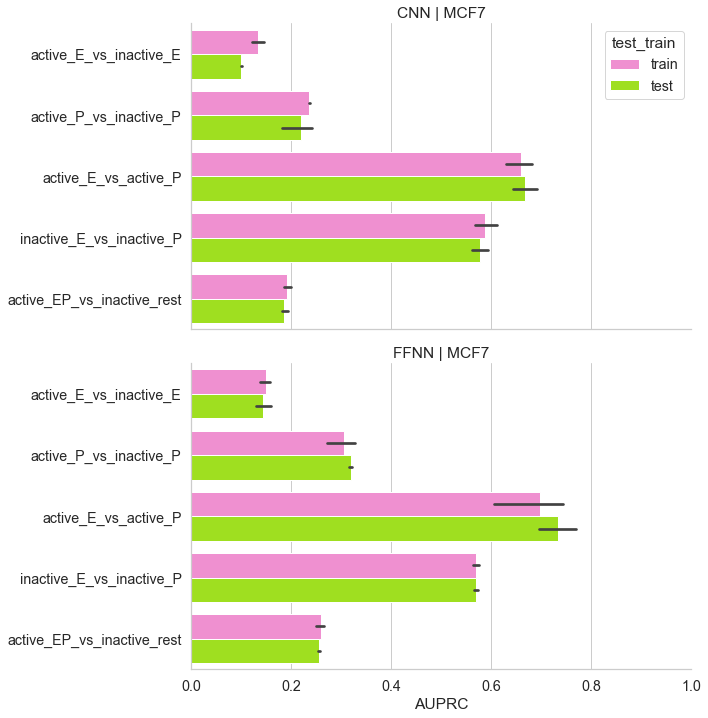

In [7]:
plot_scores(cells=cell_line, models=['FFNN','CNN'])